# Klasifikasi Kesegaran Ikan Menggunakan Machine Learning

# **Persiapan**

### Import library yang dibutuhkan

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Membuat dataframe dari file csv

In [14]:
df = pd.read_csv('fitur_30s.csv')

# **Eksplorasi Data**

### Melihat isi dataset

In [15]:
df.head()

,F1_mean,F1_max,F1_auc,F2_mean,F2_max,F2_auc,F3_mean,F3_max,F3_auc,F4_mean,...,F6_mean,F6_max,F6_auc,F7_mean,F7_max,F7_auc,F8_mean,F8_max,F8_auc,label
0,53.372868,98.731506,1579.701823,-6.148478,-4.879041,-181.715645,4.867782,5.297733,144.183773,-9.777924,...,-0.386826,0.410147,-11.336008,21.407091,34.623246,633.587169,-5.966668,-2.033646,-176.733498,A
1,49.653177,115.365247,1468.712617,-3.674616,4.483135,-109.053540,-4.457405,-3.224211,-131.971645,-4.887586,...,1.253304,5.297733,37.051088,9.250330,15.072904,273.704790,-6.853007,-2.440945,-203.088863,A
2,53.331406,118.210642,1577.509815,-9.404479,-2.950780,-278.205014,-0.649247,0.820294,-19.156145,-1.483648,...,0.635177,5.297733,18.815495,10.759249,15.072904,318.670577,-5.001745,-4.477438,-147.937758,A
3,58.885328,122.431739,1741.928648,-6.121143,-4.064443,-181.063967,-0.811310,1.099422,-23.842075,-2.828554,...,2.041158,8.462131,60.190217,7.645756,10.185318,226.336225,-4.968942,-4.477438,-146.960241,A
4,53.622290,118.691996,1586.170753,-9.343882,-3.662841,-276.777475,-1.720186,0.820294,-50.792153,-3.550555,...,1.876553,5.297733,55.623913,7.640269,9.778019,226.386354,-4.310138,0.410147,-127.857643,A


In [16]:
df.describe()

,F1_mean,F1_max,F1_auc,F2_mean,F2_max,F2_auc,F3_mean,F3_max,F3_auc,F4_mean,...,F5_auc,F6_mean,F6_max,F6_auc,F7_mean,F7_max,F7_auc,F8_mean,F8_max,F8_auc
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,8.000000e+01,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,57.016724,105.811207,1688.009423,-4.605564,-0.565554,-136.329130,1.673254,4.628217,49.724675,1.598433e+00,...,-13.042861,2.238959,6.691876,66.453120,18.534371,29.851762,548.992505,-0.504553,3.843206,-15.080238
std,31.383907,51.353142,930.007696,6.632141,5.889521,196.321372,6.306261,8.708656,186.811775,6.815839e+00,...,137.424292,3.857945,5.039215,114.265615,15.176466,25.982651,449.650064,4.462462,6.012899,132.113780
min,5.323902,31.772154,156.873267,-40.207829,-17.095156,-1189.664523,-13.331576,-9.758082,-394.581958,-1.028088e+01,...,-166.212087,-5.490782,-3.850825,-162.144796,-4.158454,0.031331,-123.167155,-8.659883,-4.477438,-256.598240
25%,37.700018,66.398248,1116.270989,-7.458383,-4.070140,-220.456027,-0.817159,0.820294,-24.077340,-3.208078e+00,...,-121.986843,-0.021257,3.999646,-0.097695,10.234044,15.072904,302.723547,-3.895995,0.410147,-115.687668
50%,52.643680,108.654786,1557.464448,-4.808332,-0.769026,-142.162090,-0.019498,1.640588,-0.437490,2.273737e-13,...,-33.921439,1.722279,5.297733,51.102042,14.412102,19.960489,427.042817,-1.316357,1.925412,-39.075620
75%,65.793857,125.665919,1946.914156,-1.116024,3.566001,-32.900628,2.451296,5.297733,72.655554,4.887586e+00,...,25.402058,3.484606,9.315180,103.345376,20.090706,34.623246,595.262631,2.647261,6.146509,78.471382
max,185.718310,300.079523,5505.077848,10.688884,15.377666,317.131386,23.122077,55.836962,685.073154,3.389165e+01,...,578.895201,14.627507,24.848075,433.543648,72.655667,127.487371,2152.909651,11.192258,25.087327,331.378299


Insight:

- Bisa dilihat bahwa terdapat 80 data ikan dengan 24 fitur aroma dari 8 sensor
- Setiap sensor diwakili dengan data mean, max, dan auc
- `fn_mean` menggambarkan nilai rata-rata respon sensor selama periode pengukuran aroma ikan yang memberikan informasi terkait kestabilan dan intensitas aroma selama waktu pengukuran
- `fn_max` menunjukkan nilai tertinggi respon sensor yang tercatat selama periode pengukuran. Nilai ini mendeteksi adanya lonjakan aroma busuk secara spesifik
- `fn_auc` menggambarkan luas area di bawah kurva respon sensor terhadap waktu selama pengukuran. AUC memberikan total akumulasi intensitas aroma yang terdeteksi sensor selama waktu pengukuran, bukan hanya titik tertentu
- Nilai pada fitur setiap sensor berbeda (ada yang bernilai besar hingga ribuan dan ada yang kecil) yang menunjukkan skala fitur tidak seragam sehingga perlu normalisasi
- Persebaran data bervariasi dilihat dari standar deviasinya. Ada yang berskala kecil di rentang 3-7 dan ada yang berskala besar di rentang 100-400
- Ada indikasi outlier di beberapa fitur jika dilihat dari perbedaan nilai mean dan max yang signifikan. Misalnya pada `F7_auc` memiliki mean 548 dan max 2152
- Ada fitur bernilai negatif yang perlu diperhatikan dalam preprocessing agar model tidak bias

Dari info setiap kolom di atas, tidak ada missing value

### Distribusi Kelas Target

In [17]:
df['label'].value_counts()

label
A    40
B    40
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

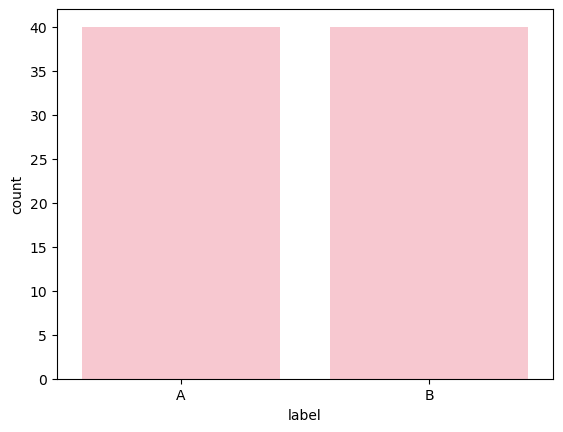

In [18]:
sns.countplot(data=df, x='label', color='pink')

Distribusi kelas A dan B seimbang

### Distribusi Fitur

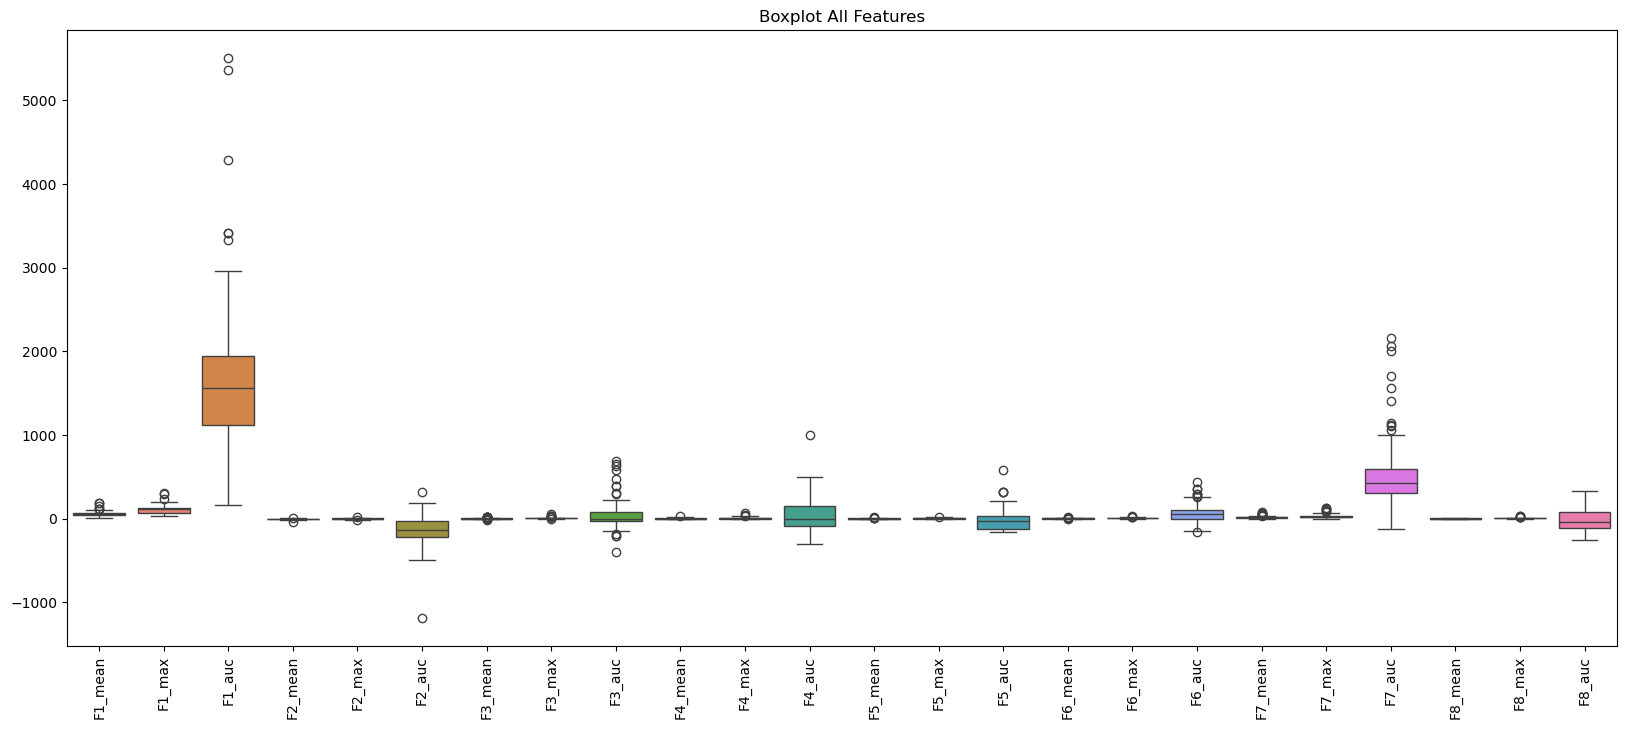

In [19]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df.drop('label', axis=1))
plt.xticks(rotation=90)
plt.title('Boxplot All Features')
plt.show()

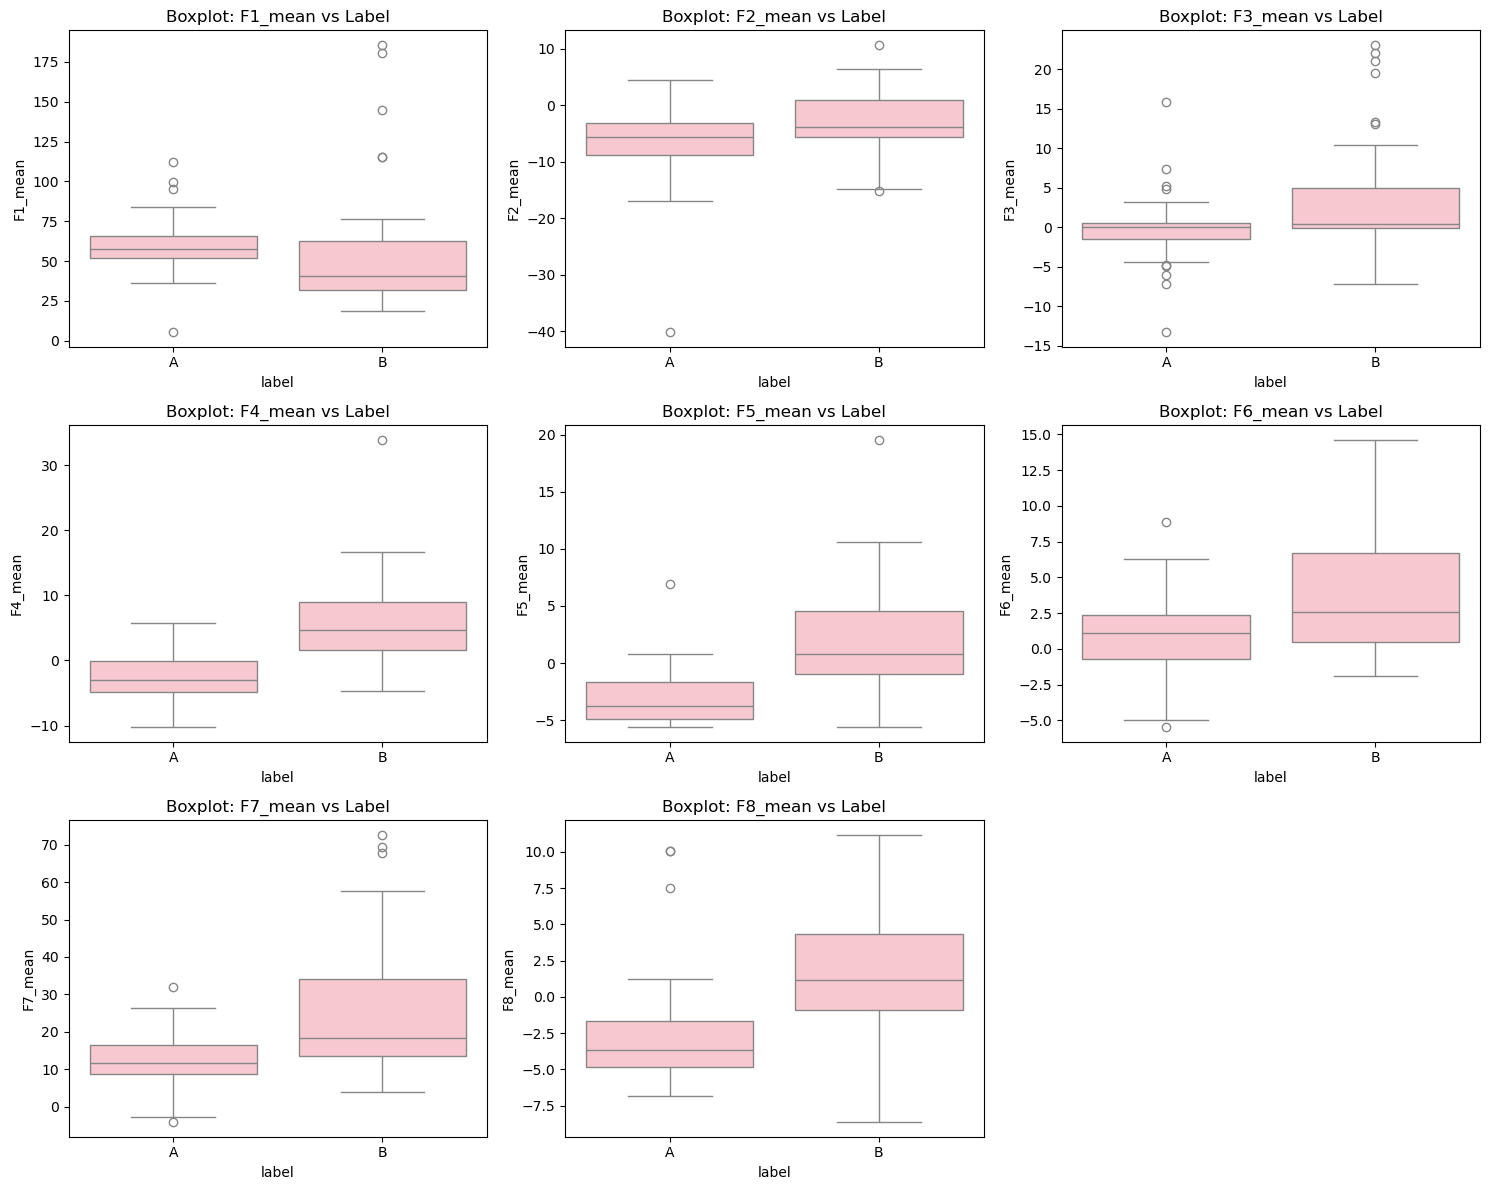

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

mean_cols = [x for x in df.columns if 'mean' in x]
n_cols = 3
n_rows = (len(mean_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(mean_cols):
    sns.boxplot(x='label', y=col, data=df, color='pink', ax=axes[idx])
    axes[idx].set_title(f'Boxplot: {col} vs Label')

for idx in range(len(mean_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

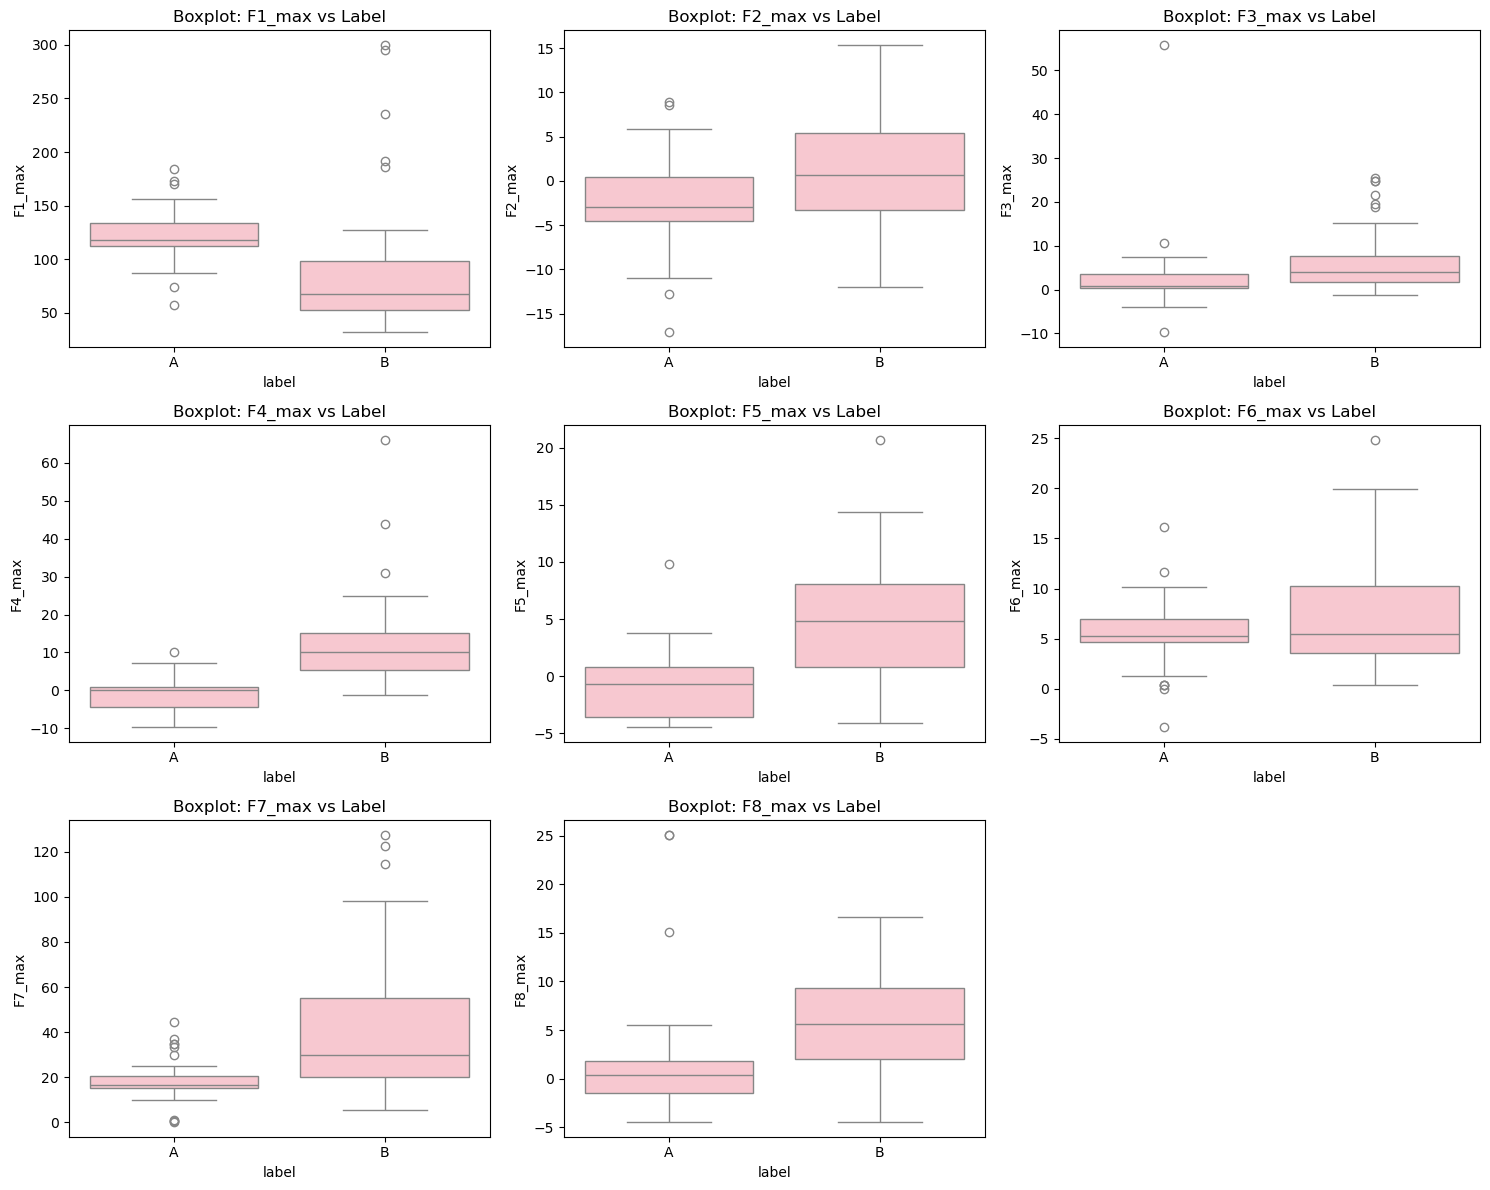

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

max_cols = [x for x in df.columns if 'max' in x]
n_cols = 3 
n_rows = (len(max_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(max_cols):
    sns.boxplot(x='label', y=col, data=df, color='pink', ax=axes[idx])
    axes[idx].set_title(f'Boxplot: {col} vs Label')

for idx in range(len(max_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

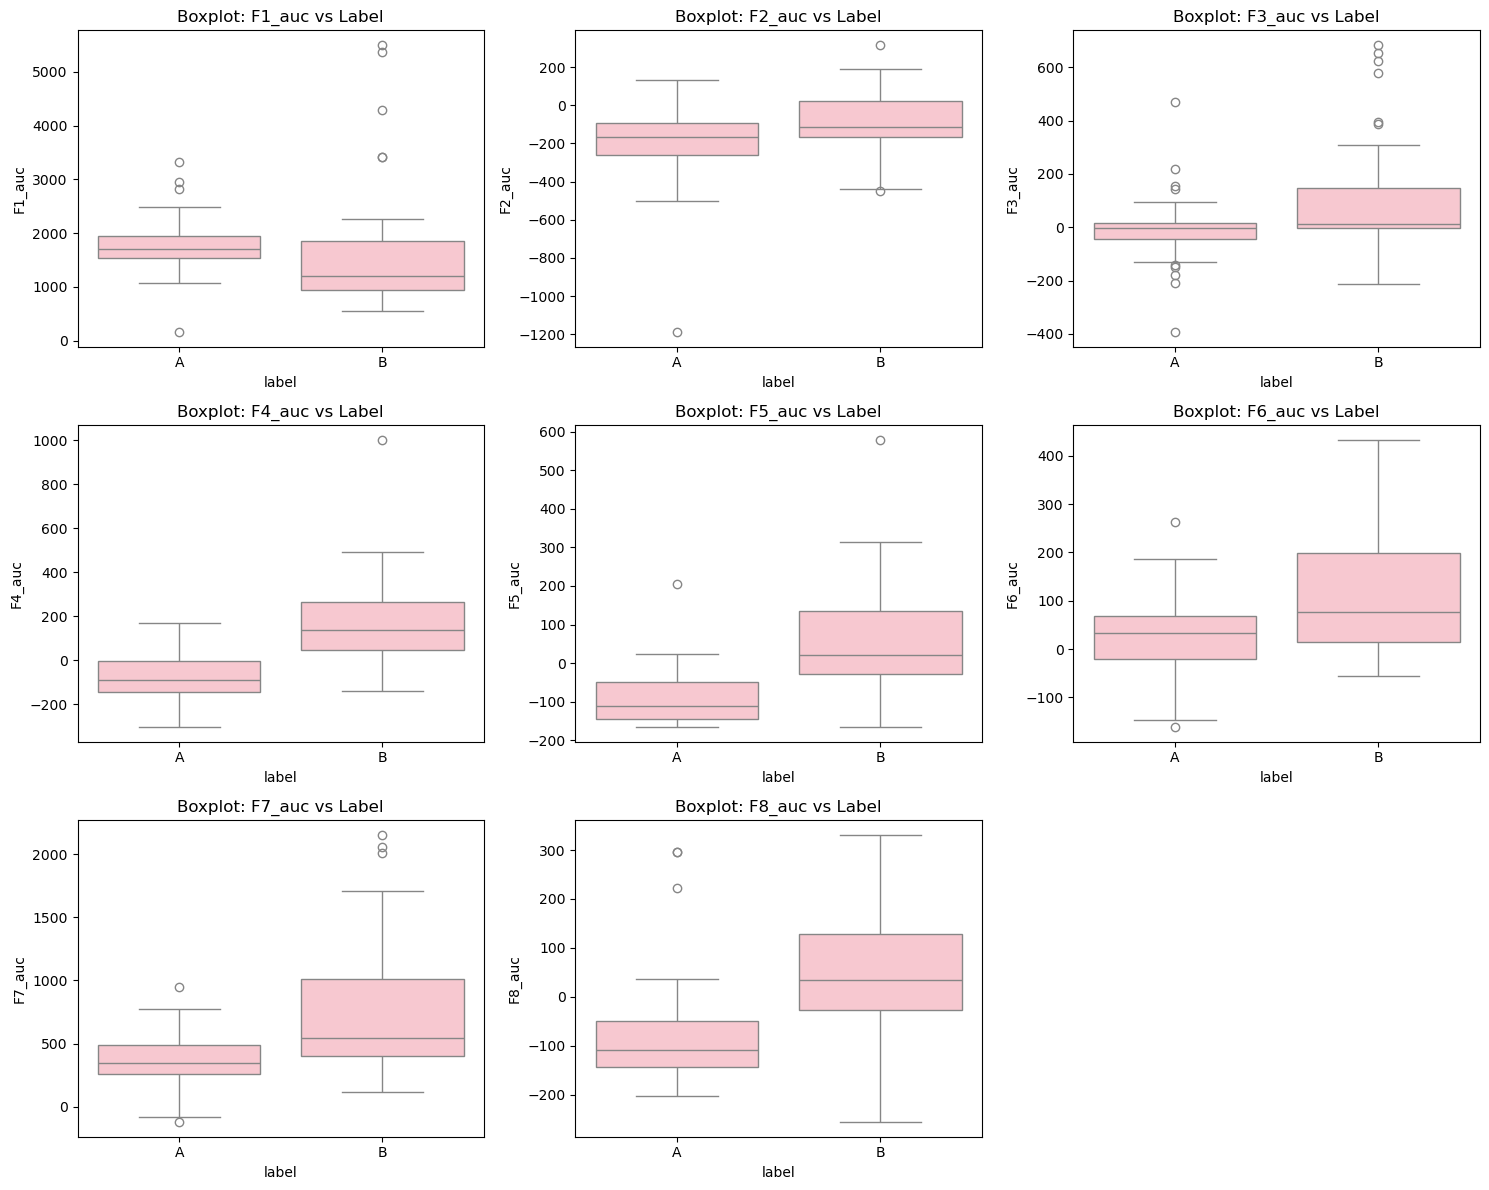

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

auc_cols = [x for x in df.columns if 'auc' in x]

n_cols = 3
n_rows = (len(auc_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten() 

for idx, col in enumerate(auc_cols):
    sns.boxplot(x='label', y=col, data=df, color='pink', ax=axes[idx])
    axes[idx].set_title(f'Boxplot: {col} vs Label')
    
for idx in range(len(auc_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

Insight:

- `f2_mean` sedikit informatif karena overlap hampir setengahnya, persebaran data mirip, dan perbedaan q2 tidak terlalu jauh.
- `f6_max` tidak informatif karena memiliki median yang sama dan overlap.
- `f2_auc` sedikit informatif karena perbedaan q2 tidak jauh, IQR mirip, serta overlap hampir setengahnya

Meski `f2_auc` memiliki outlier di salah satu label yang dapat membantu klasifikasi pada nilai ekstrem, hal tersebut tidak terlalu membantu dalam pemisahan kelas. Sebaiknya fitur-fitur di atas tidak digunakan atau dikombinasikan dengan fitur lain yang lebih informatif jika model memiliki mekanisme seleksi fitur internal seperti tree-based.

### Korelasi Fitur

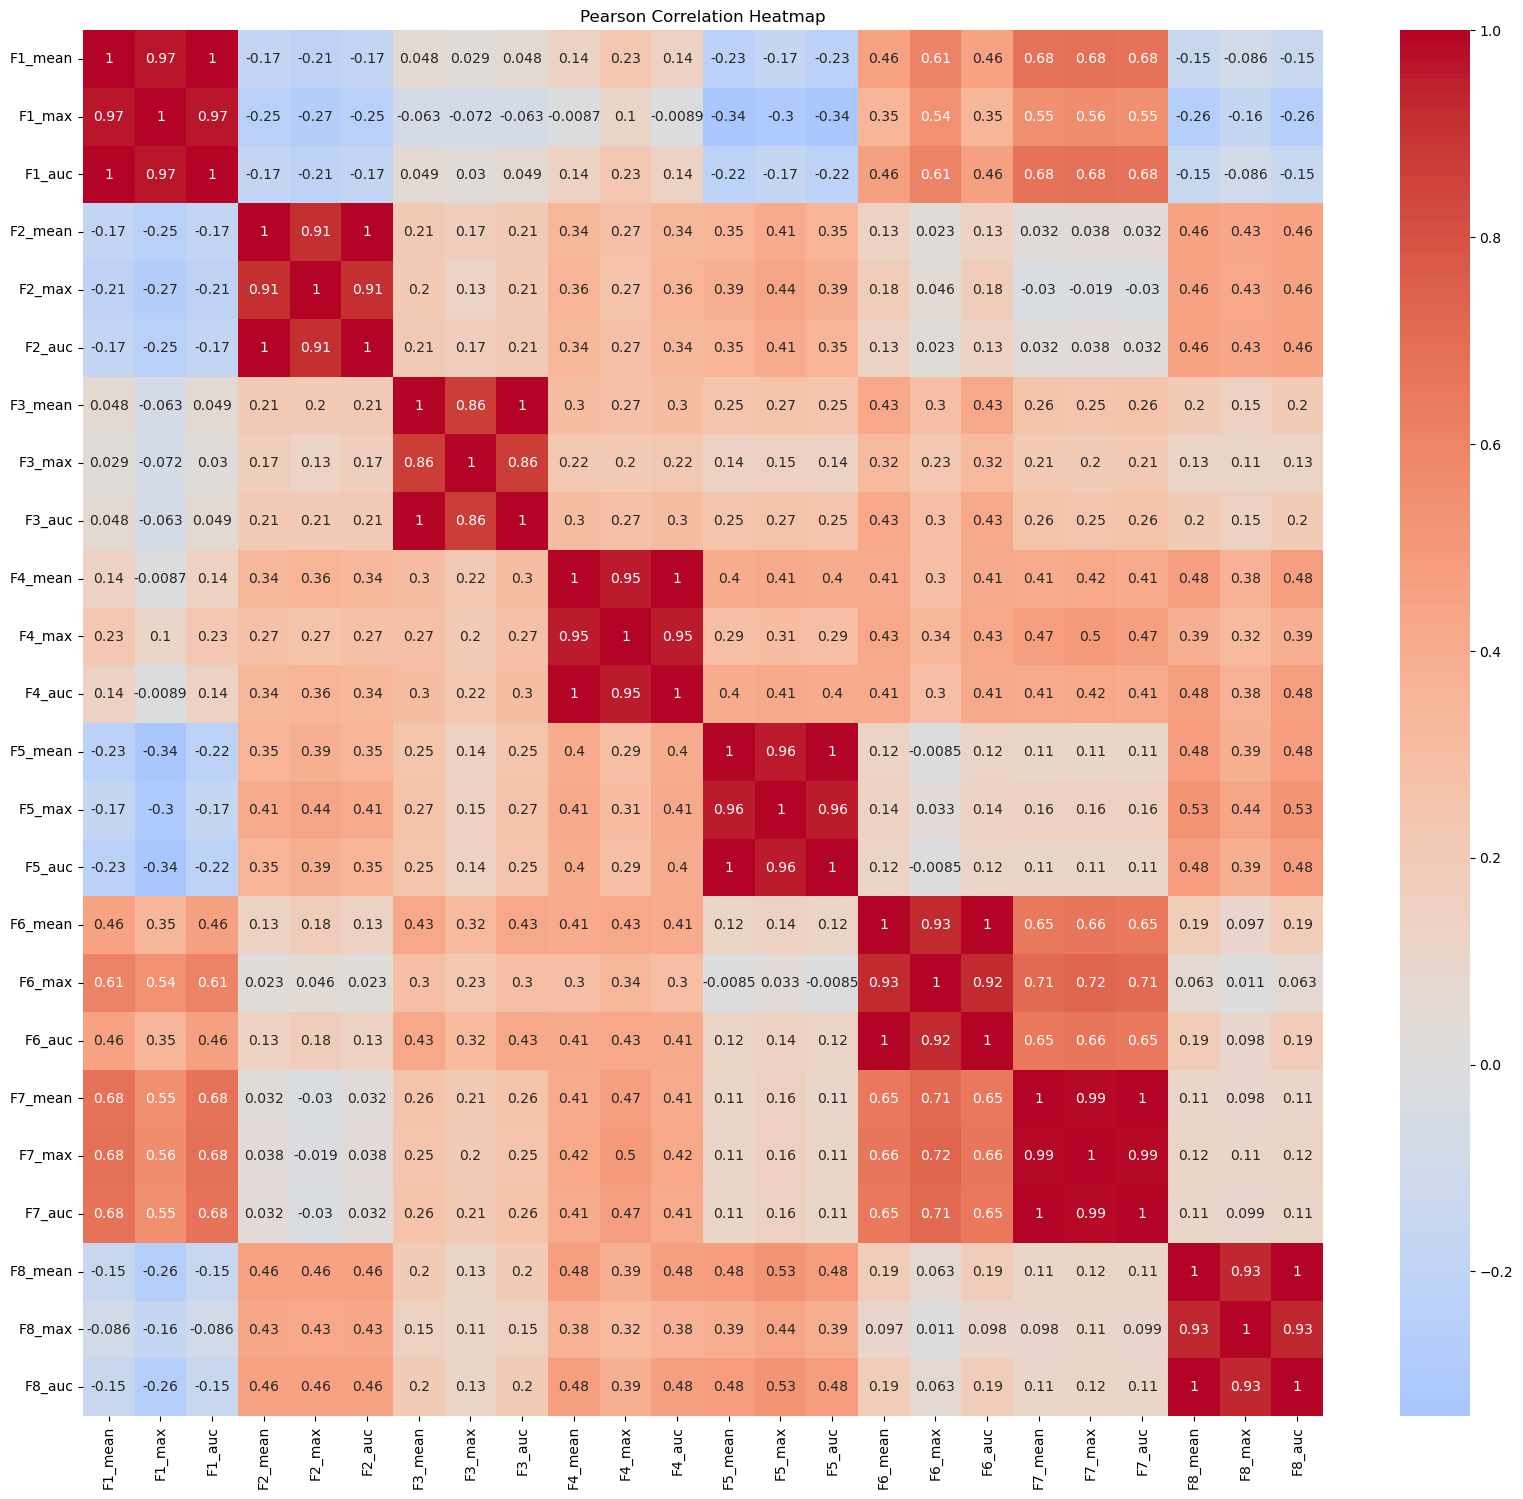

In [25]:
corr_matrix = df.corr(numeric_only=True, method="pearson")
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Pearson Correlation Heatmap")
plt.show()

Korelasi antar fitur dalam masing-masing sensor memiliki nilai yang tinggi, berarti data sensor stabil dan tidak noise

# **Pra-pemrosesan Data**

### Data Preparation

In [26]:
df.isnull().sum()

F1_mean    0
F1_max     0
F1_auc     0
F2_mean    0
F2_max     0
F2_auc     0
F3_mean    0
F3_max     0
F3_auc     0
F4_mean    0
F4_max     0
F4_auc     0
F5_mean    0
F5_max     0
F5_auc     0
F6_mean    0
F6_max     0
F6_auc     0
F7_mean    0
F7_max     0
F7_auc     0
F8_mean    0
F8_max     0
F8_auc     0
label      0
dtype: int64

In [27]:
df[df.duplicated()]

,F1_mean,F1_max,F1_auc,F2_mean,F2_max,F2_auc,F3_mean,F3_max,F3_auc,F4_mean,...,F6_mean,F6_max,F6_auc,F7_mean,F7_max,F7_auc,F8_mean,F8_max,F8_auc,label


Tidak ada data duplikat dan missing value

### Seleksi Fitur

Dijalankan di dalam pipeline model agar aman dan terhindar dari data leakage

### Dataset Splitting

Target/y perlu diencoding dari string ke numerik agar dapat diproses oleh model klasifikasi

In [28]:
X = df.drop(columns='label')
y = df['label']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, shuffle=True, random_state=42)
X_train.shape, X_test.shape

((64, 24), (16, 24))

Dengan ukuran 80:20 untuk dataset splitting, didapat data train sebesar (64,24) dan data test sebesar (16,24). Sebelum splitting, dilakukan pengacakan urutan dengan seed shuffle 42 agar setiap run tidak menghasilkan shuffle yang berbeda

# **Pemodelan**

Pemodelan dilakukan dengan membangun pipa-pipa pemrosesan agar proses pemodelan lebih terstruktur dan terdokumentasi

In [29]:
preprocessor = Pipeline([
    ("Scale", RobustScaler())
])

preprocessor

Pipeline(steps=[('Scale', RobustScaler())])

Pipa pertama yang dibangun adalah preprocessing pipeline yang berisi proses scaling. Proses encoding tidak dibutuhkan karena dataset tidak memiliki fitur kategorik. Imputasi juga tidak diperlukan sebab tidak ada missing value pada dataset. 

Kemudian seleksi fitur tidak diletakkan di pipeline ini karena beberapa model yang digunakan sudah memiliki fitur tersebut

## Modelling & Testing

### Random Forest

In [30]:
rf_model = Pipeline([
    ('prep', preprocessor),
    ('model', RandomForestClassifier(
    n_estimators=50,
    max_depth=4,
    min_samples_split=3,
    min_samples_leaf=2,
    random_state=42
    )),
])

rf_model

Pipeline(steps=[('prep', Pipeline(steps=[('Scale', RobustScaler())])),
                ('model',
                 RandomForestClassifier(max_depth=4, min_samples_leaf=2,
                                        min_samples_split=3, n_estimators=50,
                                        random_state=42))])

Ukuran dataset yang kecil dan jumlah fitur yang cukup banyak membuat model berisiko overfitting. Maka dari itu, parameter tersebut dipilih untuk membatasi kompleksitas model agar tetap general dan stabil pada dataset.

- `max_depth = 4` digunakan untuk membatasi kedalaman tree
- `min_samples_split = 3` dan `min_samples_leaf = 2` mencegah node tidak terlalu kecil
- `n_estimator = 50` digunakan agar prediksi stabil 

In [31]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(rf_model, X_train, y_train, cv=3, scoring=scoring)

print("="*40)
print("📊 Hasil K-Fold Cross-Validation (RF)")
print("="*40)

print(f"Akurasi per fold       : {np.round(cv_results['test_accuracy'], 4)}")
print(f"Precision per fold     : {np.round(cv_results['test_precision_macro'], 4)}")
print(f"Recall per fold        : {np.round(cv_results['test_recall_macro'], 4)}")
print(f"F1-score per fold      : {np.round(cv_results['test_f1_macro'], 4)}")
print("-"*40)
print(f"Akurasi rata-rata      : {cv_results['test_accuracy'].mean():.4f}")
print(f"Precision rata-rata    : {cv_results['test_precision_macro'].mean():.4f}")
print(f"Recall rata-rata       : {cv_results['test_recall_macro'].mean():.4f}")
print(f"F1-score rata-rata     : {cv_results['test_f1_macro'].mean():.4f}")
print("="*40)

📊 Hasil K-Fold Cross-Validation (RF)
Akurasi per fold       : [0.9091 0.8571 0.9524]
Precision per fold     : [0.9083 0.8606 0.9583]
Recall per fold        : [0.9083 0.8472 0.95  ]
F1-score per fold      : [0.9083 0.8518 0.9519]
----------------------------------------
Akurasi rata-rata      : 0.9062
Precision rata-rata    : 0.9091
Recall rata-rata       : 0.9019
F1-score rata-rata     : 0.9040


In [32]:
rf_model.fit(X_train, y_train)

Pipeline(steps=[('prep', Pipeline(steps=[('Scale', RobustScaler())])),
                ('model',
                 RandomForestClassifier(max_depth=4, min_samples_leaf=2,
                                        min_samples_split=3, n_estimators=50,
                                        random_state=42))])

### Decision Tree Model

In [33]:
dt_model = Pipeline([
    ('prep', preprocessor),
    ('model', DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42)),
])

dt_model

Pipeline(steps=[('prep', Pipeline(steps=[('Scale', RobustScaler())])),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        min_samples_leaf=3, min_samples_split=5,
                                        random_state=42))])

- `criterion='entropy'` dipilih dibanding `'gini'`untuk memanfaatkan pendekatan teori informasi dalam pemisahan node. Entropy mengukur ketidakpastian data sehingga split dipilih berdasarkan informasi yang diperoleh, yang diharapkan membantu pembagian data lebih informatif terutama pada dataset kecil
- `max_depth=3`, `min_samples_split=5`, dan `min_samples_leaf=3` digunakan agar pohon tetap sederhana dan general.

In [34]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(dt_model, X_train, y_train, cv=3, scoring=scoring)

print("="*40)
print("📊 Hasil K-Fold Cross-Validation (DT)")
print("="*40)

print(f"Akurasi per fold       : {np.round(cv_results['test_accuracy'], 4)}")
print(f"Precision per fold     : {np.round(cv_results['test_precision_macro'], 4)}")
print(f"Recall per fold        : {np.round(cv_results['test_recall_macro'], 4)}")
print(f"F1-score per fold      : {np.round(cv_results['test_f1_macro'], 4)}")
print("-"*40)
print(f"Akurasi rata-rata      : {cv_results['test_accuracy'].mean():.4f}")
print(f"Precision rata-rata    : {cv_results['test_precision_macro'].mean():.4f}")
print(f"Recall rata-rata       : {cv_results['test_recall_macro'].mean():.4f}")
print(f"F1-score rata-rata     : {cv_results['test_f1_macro'].mean():.4f}")
print("="*40)

📊 Hasil K-Fold Cross-Validation (DT)
Akurasi per fold       : [0.9091 0.9048 0.8571]
Precision per fold     : [0.9083 0.9028 0.8611]
Recall per fold        : [0.9083 0.9028 0.8545]
F1-score per fold      : [0.9083 0.9028 0.8558]
----------------------------------------
Akurasi rata-rata      : 0.8903
Precision rata-rata    : 0.8907
Recall rata-rata       : 0.8886
F1-score rata-rata     : 0.8890


In [35]:
dt_model.fit(X_train, y_train)

Pipeline(steps=[('prep', Pipeline(steps=[('Scale', RobustScaler())])),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        min_samples_leaf=3, min_samples_split=5,
                                        random_state=42))])

### SVM Model

In [36]:
svm_model = Pipeline([
    ('prep', preprocessor),
    ('select', SelectKBest(score_func=f_classif, k=10)),
    ('model', SVC()),
])

svm_model

Pipeline(steps=[('prep', Pipeline(steps=[('Scale', RobustScaler())])),
                ('select', SelectKBest()), ('model', SVC())])

- `SelectKBest(score_func=f_classif, k=10)`  digunakan karena SVM tidak memiliki built-in feature selection. Seleksi fitur ini membantu meningkatkan performa SVM dengan memilih 10 fitur terbaik berdasarkan ANOVA F-value pada data klasifikasi sebelum training model

In [37]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(svm_model, X_train, y_train, cv=3, scoring=scoring)

print("="*40)
print("📊 Hasil K-Fold Cross-Validation (SVM)")
print("="*40)

print(f"Akurasi per fold       : {np.round(cv_results['test_accuracy'], 4)}")
print(f"Precision per fold     : {np.round(cv_results['test_precision_macro'], 4)}")
print(f"Recall per fold        : {np.round(cv_results['test_recall_macro'], 4)}")
print(f"F1-score per fold      : {np.round(cv_results['test_f1_macro'], 4)}")
print("-"*40)
print(f"Akurasi rata-rata      : {cv_results['test_accuracy'].mean():.4f}")
print(f"Precision rata-rata    : {cv_results['test_precision_macro'].mean():.4f}")
print(f"Recall rata-rata       : {cv_results['test_recall_macro'].mean():.4f}")
print(f"F1-score rata-rata     : {cv_results['test_f1_macro'].mean():.4f}")
print("="*40)

📊 Hasil K-Fold Cross-Validation (SVM)
Akurasi per fold       : [0.8636 0.8095 0.9048]
Precision per fold     : [0.8675 0.8056 0.9045]
Recall per fold        : [0.8583 0.8056 0.9045]
F1-score per fold      : [0.8611 0.8056 0.9045]
----------------------------------------
Akurasi rata-rata      : 0.8593
Precision rata-rata    : 0.8592
Recall rata-rata       : 0.8561
F1-score rata-rata     : 0.8571


In [38]:
svm_model.fit(X_train, y_train)

Pipeline(steps=[('prep', Pipeline(steps=[('Scale', RobustScaler())])),
                ('select', SelectKBest()), ('model', SVC())])

### KNN Model

In [39]:
knn_model = Pipeline([
    ("prep",preprocessor),
    ('select', SelectKBest(score_func=f_classif, k=10)),
    ('model', KNeighborsClassifier(n_neighbors=5)),
])

knn_model

Pipeline(steps=[('prep', Pipeline(steps=[('Scale', RobustScaler())])),
                ('select', SelectKBest()), ('model', KNeighborsClassifier())])

Sama seperti SVM, KNN juga menggunakan `SelectKBest(score_func=f_classif, k=10)` untuk meningkatkan performa model

In [40]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(knn_model, X_train, y_train, cv=3, scoring=scoring)

print("="*40)
print("📊 Hasil K-Fold Cross-Validation (KNN)")
print("="*40)

print(f"Akurasi per fold       : {np.round(cv_results['test_accuracy'], 4)}")
print(f"Precision per fold     : {np.round(cv_results['test_precision_macro'], 4)}")
print(f"Recall per fold        : {np.round(cv_results['test_recall_macro'], 4)}")
print(f"F1-score per fold      : {np.round(cv_results['test_f1_macro'], 4)}")
print("-"*40)
print(f"Akurasi rata-rata      : {cv_results['test_accuracy'].mean():.4f}")
print(f"Precision rata-rata    : {cv_results['test_precision_macro'].mean():.4f}")
print(f"Recall rata-rata       : {cv_results['test_recall_macro'].mean():.4f}")
print(f"F1-score rata-rata     : {cv_results['test_f1_macro'].mean():.4f}")
print("="*40)

📊 Hasil K-Fold Cross-Validation (KNN)
Akurasi per fold       : [0.8182 0.8095 0.8571]
Precision per fold     : [0.8167 0.8056 0.8591]
Recall per fold        : [0.8167 0.8056 0.8591]
F1-score per fold      : [0.8167 0.8056 0.8571]
----------------------------------------
Akurasi rata-rata      : 0.8283
Precision rata-rata    : 0.8271
Recall rata-rata       : 0.8271
F1-score rata-rata     : 0.8265


In [41]:
knn_model.fit(X_train, y_train)

Pipeline(steps=[('prep', Pipeline(steps=[('Scale', RobustScaler())])),
                ('select', SelectKBest()), ('model', KNeighborsClassifier())])

## Testing

### Random Forest

📊 Hasil Evaluasi Testing (RF)
Akurasi test set       : 1.0000
Precision test set     : 1.0000
Recall test set        : 1.0000
F1-score test set      : 1.0000

📄 RF Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         5

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



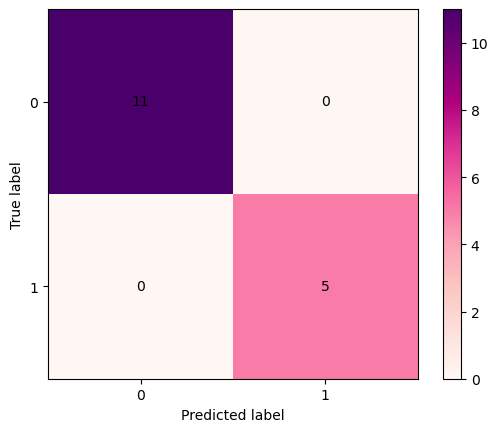

In [42]:
y_pred_rf = rf_model.predict(X_test)

acc_test = accuracy_score(y_test, y_pred_rf)
prec_test = precision_score(y_test, y_pred_rf, average='macro')
rec_test = recall_score(y_test, y_pred_rf, average='macro')
f1_test = f1_score(y_test, y_pred_rf, average='macro')

print("="*40)
print("📊 Hasil Evaluasi Testing (RF)")
print("="*40)
print(f"Akurasi test set       : {acc_test:.4f}")
print(f"Precision test set     : {prec_test:.4f}")
print(f"Recall test set        : {rec_test:.4f}")
print(f"F1-score test set      : {f1_test:.4f}")
print("="*40)

print("\n📄 RF Classification Report:")
print(classification_report(y_test, y_pred_rf))

cm1 = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot(cmap='RdPu')
for text in disp.text_.ravel():
    text.set_color('black')

### Decision Tree Model

📊 Hasil Evaluasi Testing (DT)
Akurasi test set       : 0.8750
Precision test set     : 0.8571
Recall test set        : 0.9091
F1-score test set      : 0.8667

📄 DT Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.71      1.00      0.83         5

    accuracy                           0.88        16
   macro avg       0.86      0.91      0.87        16
weighted avg       0.91      0.88      0.88        16



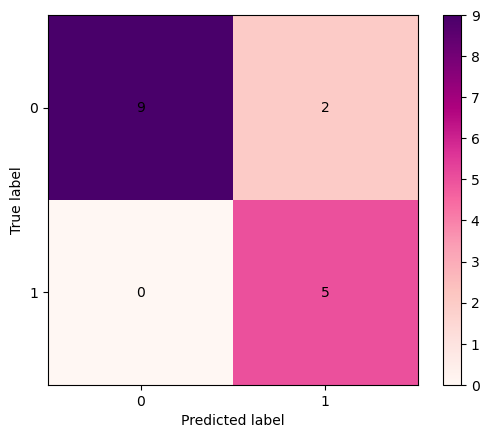

In [43]:
y_pred_dt = dt_model.predict(X_test)

acc_test = accuracy_score(y_test, y_pred_dt)
prec_test = precision_score(y_test, y_pred_dt, average='macro')
rec_test = recall_score(y_test, y_pred_dt, average='macro')
f1_test = f1_score(y_test, y_pred_dt, average='macro')

print("="*40)
print("📊 Hasil Evaluasi Testing (DT)")
print("="*40)
print(f"Akurasi test set       : {acc_test:.4f}")
print(f"Precision test set     : {prec_test:.4f}")
print(f"Recall test set        : {rec_test:.4f}")
print(f"F1-score test set      : {f1_test:.4f}")
print("="*40)

print("\n📄 DT Classification Report:")
print(classification_report(y_test, y_pred_dt))

cm2 = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot(cmap='RdPu')
for text in disp.text_.ravel():
    text.set_color('black')

### SVM Model

📊 Hasil Evaluasi Testing (SVM)
Akurasi test set       : 0.9375
Precision test set     : 0.9583
Recall test set        : 0.9000
F1-score test set      : 0.9227

📄 SVM Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.80      0.89         5

    accuracy                           0.94        16
   macro avg       0.96      0.90      0.92        16
weighted avg       0.94      0.94      0.94        16



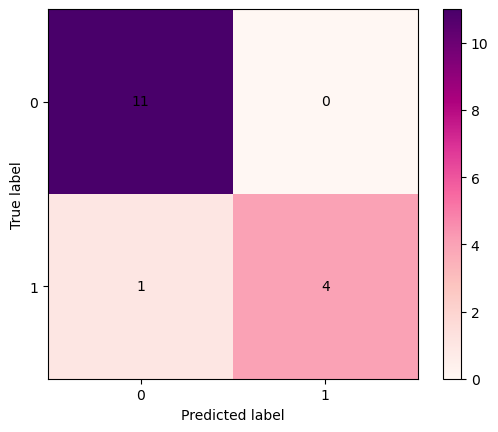

In [44]:
y_pred_svm = svm_model.predict(X_test)

acc_test = accuracy_score(y_test, y_pred_svm)
prec_test = precision_score(y_test, y_pred_svm, average='macro')
rec_test = recall_score(y_test, y_pred_svm, average='macro')
f1_test = f1_score(y_test, y_pred_svm, average='macro')

print("="*40)
print("📊 Hasil Evaluasi Testing (SVM)")
print("="*40)
print(f"Akurasi test set       : {acc_test:.4f}")
print(f"Precision test set     : {prec_test:.4f}")
print(f"Recall test set        : {rec_test:.4f}")
print(f"F1-score test set      : {f1_test:.4f}")
print("="*40)

print("\n📄 SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

cm3 = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot(cmap='RdPu')
for text in disp.text_.ravel():
    text.set_color('black')

### KNN Model

📊 Hasil Evaluasi Testing (KNN)
Akurasi test set       : 1.0000
Precision test set     : 1.0000
Recall test set        : 1.0000
F1-score test set      : 1.0000

📄 KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         5

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



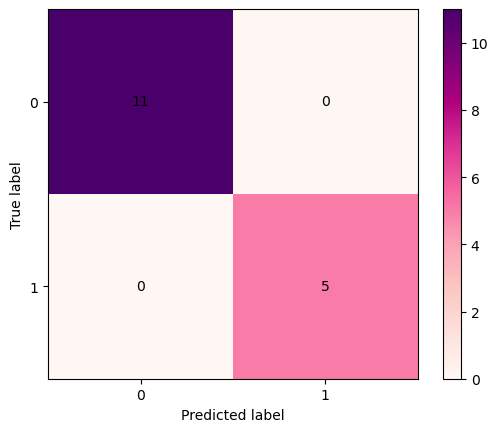

In [45]:
y_pred_knn = knn_model.predict(X_test)

acc_test = accuracy_score(y_test, y_pred_knn)
prec_test = precision_score(y_test, y_pred_knn, average='macro')
rec_test = recall_score(y_test, y_pred_knn, average='macro')
f1_test = f1_score(y_test, y_pred_knn, average='macro')

print("="*40)
print("📊 Hasil Evaluasi Testing (KNN)")
print("="*40)
print(f"Akurasi test set       : {acc_test:.4f}")
print(f"Precision test set     : {prec_test:.4f}")
print(f"Recall test set        : {rec_test:.4f}")
print(f"F1-score test set      : {f1_test:.4f}")
print("="*40)

print("\n📄 KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm4 = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4)
disp.plot(cmap='RdPu')
for text in disp.text_.ravel():
    text.set_color('black')

# **Interpretasi**

## Feature Importaces

### Random Forest

In [32]:
importances = rf_model.named_steps['model'].feature_importances_
feature_names = preprocessor.get_feature_names_out()

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("="*55)
print("Hasil Analisis Feature Importance (Random Forest)")
print("="*55)
for idx, row in feature_importance_df.iterrows():
    print(f"{row['Feature']:<25} | Importance: {row['Importance']:.4f}")
print("="*55)

Hasil Analisis Feature Importance (Random Forest)
F4_max                    | Importance: 0.1183
F1_max                    | Importance: 0.0774
F1_mean                   | Importance: 0.0750
F1_auc                    | Importance: 0.0749
F5_mean                   | Importance: 0.0733
F7_max                    | Importance: 0.0728
F5_max                    | Importance: 0.0719
F8_auc                    | Importance: 0.0702
F4_auc                    | Importance: 0.0683
F8_mean                   | Importance: 0.0365
F4_mean                   | Importance: 0.0333
F5_auc                    | Importance: 0.0316
F8_max                    | Importance: 0.0299
F7_auc                    | Importance: 0.0282
F3_max                    | Importance: 0.0269
F6_auc                    | Importance: 0.0231
F3_auc                    | Importance: 0.0230
F7_mean                   | Importance: 0.0230
F6_mean                   | Importance: 0.0118
F3_mean                   | Importance: 0.0117
F2_max    

Urutan fitur di atas adalah kontribusi fitur yang berpengaruh pada model random forest. Didapat bahwa `f4-max` adalah fitur yang paling berpengaruh dan sensor f1 paling berpengaruh karena ketiga fiturnya menempati urutan teratas

### DTM Model

In [33]:
importances = dt_model.named_steps['model'].feature_importances_
feature_names = preprocessor.get_feature_names_out()

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("="*55)
print("Hasil Analisis Feature Importance (Decision Tree)")
print("="*55)
for idx, row in feature_importance_df.iterrows():
    print(f"{row['Feature']:<25} | Importance: {row['Importance']:.4f}")
print("="*55)

Hasil Analisis Feature Importance (Decision Tree)
F4_max                    | Importance: 0.4468
F1_auc                    | Importance: 0.3430
F3_max                    | Importance: 0.1333
F4_auc                    | Importance: 0.0769
F2_mean                   | Importance: 0.0000
F2_max                    | Importance: 0.0000
F1_max                    | Importance: 0.0000
F1_mean                   | Importance: 0.0000
F3_mean                   | Importance: 0.0000
F2_auc                    | Importance: 0.0000
F4_mean                   | Importance: 0.0000
F3_auc                    | Importance: 0.0000
F5_mean                   | Importance: 0.0000
F5_max                    | Importance: 0.0000
F5_auc                    | Importance: 0.0000
F6_mean                   | Importance: 0.0000
F6_max                    | Importance: 0.0000
F6_auc                    | Importance: 0.0000
F7_mean                   | Importance: 0.0000
F7_max                    | Importance: 0.0000
F7_auc    

Urutan fitur di atas adalah kontribusi fitur yang berpengaruh pada model decision tree. Terdapat 4 fitur yang berkontribusi yaitu `f4_max`, `f1_auc`, `f3_max`, dan `f4_auc`

### SVM Model

In [34]:
feature_names = preprocessor.get_feature_names_out()
selector = svm_model.named_steps['select']
mask = selector.get_support()
scores = selector.scores_
selected_features = feature_names[mask]
selected_scores = scores[mask]

print("="*50)
print("Hasil Seleksi Fitur SVM (SelectKBest + ANOVA F-test)")
print("="*50)
for name, score in sorted(zip(selected_features, selected_scores), key=lambda x: x[1], reverse=True):
    print(f"{name:<20} | Skor F-test: {score:.4f}")
print("="*50)

Hasil Seleksi Fitur SVM (SelectKBest + ANOVA F-test)
F4_mean              | Skor F-test: 28.1683
F4_auc               | Skor F-test: 28.1638
F5_max               | Skor F-test: 27.8823
F4_max               | Skor F-test: 24.3613
F5_mean              | Skor F-test: 23.4852
F5_auc               | Skor F-test: 23.4615
F7_max               | Skor F-test: 15.3863
F7_auc               | Skor F-test: 13.2930
F7_mean              | Skor F-test: 13.2836
F8_auc               | Skor F-test: 11.5962


Dengan bantuan SelectKBest, diperoleh 10 fitur terbaik untuk digunakan pada model SVM. Dari hasil seleksi tersebut, `f4_mean` menjadi fitur dengan pengaruh paling besar

### KNN Model

In [35]:
feature_names = preprocessor.get_feature_names_out()
selector = knn_model.named_steps['select']
mask = selector.get_support()
scores = selector.scores_
selected_features = feature_names[mask]
selected_scores = scores[mask]

print("="*50)
print("Hasil Seleksi Fitur KNN (SelectKBest + ANOVA F-test)")
print("="*50)
for name, score in sorted(zip(selected_features, selected_scores), key=lambda x: x[1], reverse=True):
    print(f"{name:<20} | Skor F-test: {score:.4f}")
print("="*50)

Hasil Seleksi Fitur KNN (SelectKBest + ANOVA F-test)
F4_mean              | Skor F-test: 28.1683
F4_auc               | Skor F-test: 28.1638
F5_max               | Skor F-test: 27.8823
F4_max               | Skor F-test: 24.3613
F5_mean              | Skor F-test: 23.4852
F5_auc               | Skor F-test: 23.4615
F7_max               | Skor F-test: 15.3863
F7_auc               | Skor F-test: 13.2930
F7_mean              | Skor F-test: 13.2836
F8_auc               | Skor F-test: 11.5962


Hasil seleksi fitur sama dengan model SVM karena menggunakan cara yang sama yaitu SelectKBest

## ROC AUC

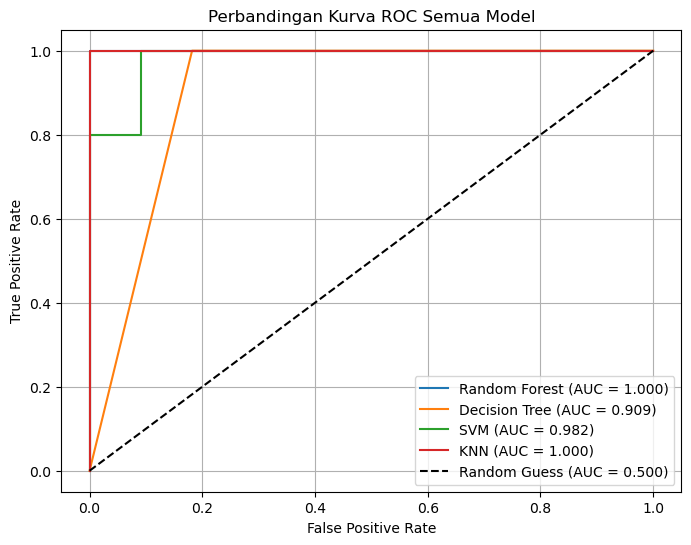

In [36]:
plt.figure(figsize=(8, 6))

# =============================
# Random Forest
# =============================
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})')

# =============================
# Decision Tree
# =============================
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
auc_dt = roc_auc_score(y_test, y_proba_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.3f})')

# =============================
# SVM
# =============================
y_score_svm = svm_model.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
auc_svm = roc_auc_score(y_test, y_score_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.3f})')

# =============================
# KNN
# =============================
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
auc_knn = roc_auc_score(y_test, y_proba_knn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.3f})')

# =============================
# Plot Styling
# =============================
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.500)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Perbandingan Kurva ROC Semua Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# **Penyimpanan Model dan Hasil Prediksi**

### Save Model

In [37]:
models = {
    'rf_model.pkl': rf_model,
    'dt_model.pkl': dt_model,
    'svm_model.pkl': svm_model,
    'knn_model.pkl': knn_model
}

for filename, model in models.items():
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

### y_pred.csv

In [75]:
rng = np.random.default_rng(seed=30)
sample_indices = rng.choice(len(X_test), size=5, replace=False)

X_sample = X_test.iloc[sample_indices]
y_sample_true = y_test[sample_indices]

In [76]:
y_pred_sample_rf = rf_model.predict(X_sample)
y_pred_sample_dt = dt_model.predict(X_sample)
y_pred_sample_svm = svm_model.predict(X_sample)
y_pred_sample_knn = knn_model.predict(X_sample)

In [79]:
df_pred = pd.DataFrame({
    'True_Label': y_sample_true,
    'RF_Pred': y_pred_sample_rf,
    'DT_Pred': y_pred_sample_dt,
    'SVM_Pred': y_pred_sample_svm,
    'KNN_Pred': y_pred_sample_knn
})

df_pred.to_csv('y_pred.csv', index=True)

In [80]:
df_pred

,True_Label,RF_Pred,DT_Pred,SVM_Pred,KNN_Pred
0,0,0,0,0,0
1,1,1,1,0,1
2,0,0,0,0,0
3,1,1,1,1,1
4,0,0,0,0,0
